## E-commerce Data Analysis Report: Uncovering Sales Patterns and Customer Insights

In the realm of data science, our mission is to unlock the potential hidden within a vast trove of e-commerce sales data using Python and the scikit-learn library. The business case at hand is to better understand the customer base of an e-commerce company, and transforming this information into actionable insights.

Our journey begins with data preparation, where I clean, format, and structure the raw data, ensuring that the data is in a state that can be effectively analyzed.

The true artistry of the work comes to light in the segmentation phase. With Python and scikit-learn, I employ the K-means clustering algorithm to partition the customers into distinct segments. These segments aren't arbitrary divisions but rather the keys to understanding customer behavior, preferences, and needs. Our clustering model paints a vivid picture of the customer landscape, allowing the e-commerce company to tailor its strategies, products, and interactions to cater to each segment's unique characteristics.

But our journey doesn't end there. I recognize the importance of precision, and so I delve into hyperparameter tuning to fine-tune the clustering model to perfection. This step ensures that the segments aren't just loosely defined groups but accurate reflections of customer behavior.

It equips the e-commerce company with the insights needed to make data-driven decisions, enhance customer satisfaction, boost sales, and optimize marketing efforts.


### Step 1: Unlocking Sales Secrets.

I've just loaded an e-commerce dataset using Python, and  task to delve into the depths of this data. Using pandas we'll explore trends, customer behaviors, and product insights that will not only drive sales but rewrite the success story of this e-commerce business.

In [23]:
#--- Importing libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#--- Read in dataset ----
df = pd.read_csv('./Orders_Analysis.csv')

#--- Inspect data ---
df.head()

,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
0,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657,1312378,83290718932496,04/12/2018,2,200.0,-200.00,0.00,0.0,0.0,0.0,0,2
1,RJF,Product P,28 / A / MTM,83-490-E49-8C8-8-3B100BC,56914686,3715657,36253792848113,01/04/2019,2,190.0,-190.00,0.00,0.0,0.0,0.0,0,2
2,CLH,Product B,32 / B / FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862,9533448,73094559597229,05/11/2018,0,164.8,-156.56,-8.24,0.0,0.0,0.0,-2,2
3,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,53616575668264,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1
4,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,29263220319421,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1


### Step 2: Quantifying Success.

Filtering the dataset to retain only records with a positive ordered item quantity.

On a mission to uncover the golden equation that defines what makes products and orders successful in this e-commerce realm.

In [24]:
#--- WRITE YOUR CODE FOR TASK 2 ---
df = df[df['ordered_item_quantity']>0]

#--- Inspect data ---
df.head()

,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
0,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657,1312378,83290718932496,04/12/2018,2,200.0,-200.00,0.00,0.0,0.0,0.0,0,2
1,RJF,Product P,28 / A / MTM,83-490-E49-8C8-8-3B100BC,56914686,3715657,36253792848113,01/04/2019,2,190.0,-190.00,0.00,0.0,0.0,0.0,0,2
2,CLH,Product B,32 / B / FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862,9533448,73094559597229,05/11/2018,0,164.8,-156.56,-8.24,0.0,0.0,0.0,-2,2
3,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,53616575668264,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1
4,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,29263220319421,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1


### Step 3: Customer Code: Deciphering Buying Patterns with Binary Encoding

The mission is crystal clear - decode the intricate buying patterns of e-commerce customers. 
The aggregation of customer behaviors aligns with my objective, as I aim to discern the customers who have made purchases from those who haven't. 
In this step, w'll explore customer purchase behaviors by:
Aggregating ordered_item_quantity by customer_id and product_type.
Encoding purchases into binary values (1 for orders and 0 for no orders) to categorize customer engagement with each product type.
Summing up the encoded values to provide an overall "products ordered" score.

In [25]:
def encode_column(column):
    if column > 0:
        return 1
    if column <= 0:
        return 0


In [26]:

column_list = ["customer_id", "product_type"]
aggregated_dataframe = (df
                        .groupby(column_list)
                        .ordered_item_quantity.count()
                        .reset_index())

aggregated_dataframe["products_ordered"] = (aggregated_dataframe.ordered_item_quantity.apply(encode_column))

aggregated_dataframe.head()

,customer_id,product_type,ordered_item_quantity,products_ordered
0,1000661,Product P,3,1
1,1001914,Product B,1,1
2,1002167,Product H,1,1
3,1002167,Product P,1,1
4,1002167,Product W,1,1


In [27]:
customers_orders = (aggregated_dataframe.groupby(column_list[0]).products_ordered.sum().reset_index())
customers_orders.head()

,customer_id,products_ordered
0,1000661,1
1,1001914,1
2,1002167,3
3,1002387,1
4,1002419,2


### Step 4: Unveiling Return Rate Insights.

As I calculate the sum of ordered and returned items by customer and order, I aim to unravel the balance between what's bought and what's sent back. The introduction of the "average return rate" offers a fresh perspective, providing insights into customer behaviors and product quality. 

Returns can significantly impact customer satisfaction and perceptions of product quality. We calculated the average_return_rate for each customer and order by:
Summing ordered_item_quantity and returned_item_quantity per order.
Calculating the average_return_rate as the ratio of returned items to ordered items.

This analysis provided insights into return behaviors, highlighting potential product or order-related issues that might affect customer retention.

In [28]:
ordered_sum_by_customer_order = (df.groupby(["customer_id", "order_id"]).ordered_item_quantity.sum().reset_index())

returned_sum_by_customer_order = (df.groupby(["customer_id", "order_id"]).returned_item_quantity.sum().reset_index())


ordered_returned_sums = pd.merge(ordered_sum_by_customer_order, returned_sum_by_customer_order)

ordered_returned_sums.head()

,customer_id,order_id,ordered_item_quantity,returned_item_quantity
0,1000661,99119989117212,3,0
1,1001914,79758569034715,1,0
2,1002167,38156088848638,1,0
3,1002167,57440147820257,1,0
4,1002167,58825523953710,1,0


In [29]:
ordered_returned_sums["average_return_rate"] = (-1 * ordered_returned_sums["returned_item_quantity"] / ordered_returned_sums["ordered_item_quantity"])
#--- Inspect data ---
ordered_returned_sums.head()

,customer_id,order_id,ordered_item_quantity,returned_item_quantity,average_return_rate
0,1000661,99119989117212,3,0,0.0
1,1001914,79758569034715,1,0,0.0
2,1002167,38156088848638,1,0,0.0
3,1002167,57440147820257,1,0,0.0
4,1002167,58825523953710,1,0,0.0


### Step 5: Charting the Path to Customer Satisfaction.

This data-driven pursuit doesn't just stop at numbers; it's about revealing the stories behind each return. As I merge and reshape the data, I'm paving the way for the e-commerce business to craft strategies that enhance customer satisfaction. 



In [30]:
# Group 'ordered_returned_sums' by 'customer_id' and calculate the mean of 'average_return_rate'
customer_return_rate = (ordered_returned_sums.groupby("customer_id").average_return_rate.mean().reset_index())

return_rates = pd.DataFrame(customer_return_rate["average_return_rate"].value_counts().reset_index())

return_rates.rename(columns={"count": "count of unit return rate", "average_return_rate": "average return rate"}, inplace=True)

customers = pd.merge(customers_orders, customer_return_rate, on="customer_id")

customers.head()

,customer_id,products_ordered,average_return_rate
0,1000661,1,0.0
1,1001914,1,0.0
2,1002167,3,0.0
3,1002387,1,0.0
4,1002419,2,0.0


### Step 6: Customer Spending Analysis.

Renaming columns for clarity, preparing a roadmap for the e-commerce company to comprehend customer spending patterns and to identify the high-value customers. 


In [31]:
# Group 'df' by 'customer_id' and sum 'total_sales', then reset the index
customer_total_spending = df.groupby("customer_id").agg({"total_sales": "sum"}).reset_index()

# Rename the 'total_sales' column to 'total_spending'
customer_total_spending = customer_total_spending.rename(columns={"total_sales": "total_spending"})

#--- Inspect data ---
customer_total_spending.head()

,customer_id,total_spending
0,1000661,260.0
1,1001914,79.2
2,1002167,234.2
3,1002387,89.0
4,1002419,103.0


### Task 7: Customer Chronicles: Weaving a Tapestry of Insights.

I've shaped the data tapestry, and now it's a map to understanding customer behaviors, return rates, and the financial footprint of loyalty. 
As we remove the identifier and streamline the data, you're arming the e-commerce business with a holistic view of its customers. 

Merge the spending information with the main customer DataFrame and drop the identifier for a streamlined view.


In [32]:
# Merge the 'customers' DataFrame with 'customer_total_spending' on 'customer_id'

customers = customers.merge(customer_total_spending,
                            on="customer_id")

customers.drop(columns="customer_id",
               inplace=True)
#--- Inspect data ---
customers

,products_ordered,average_return_rate,total_spending
0,1,0.0,260.0
1,1,0.0,79.2
2,3,0.0,234.2
3,1,0.0,89.0
4,2,0.0,103.0
...,...,...,...
24869,2,0.0,259.0
24870,2,0.0,242.5
24871,1,0.0,89.0
24872,2,0.0,267.0


### Step 8: Transformed Insights.

By applying logarithmic transformations and rounding to two decimal places, to elevate the data into a realm of precision and clarity. The columns "products_ordered," "average_return_rate," and "total_spending" are now elegantly reshaped, revealing a new perspective on behavior and loyalty.


In [33]:
# Objective: Elevate data clarity by applying logarithmic transformations for easier interpretation of spending behavior.
# Approach: Log-transform key columns and round the results for readability, aiding in customer segmentation.

columns = ["products_ordered", "average_return_rate", "total_spending"]
for column in columns:
    transformed_column = np.log1p(customers[column])
    rounded_column = transformed_column.round(2)  # Round to 2 decimal places
    customers["log_" + column] = rounded_column
customers.head()

,products_ordered,average_return_rate,total_spending,log_products_ordered,log_average_return_rate,log_total_spending
0,1,0.0,260.0,0.69,0.0,5.56
1,1,0.0,79.2,0.69,0.0,4.38
2,3,0.0,234.2,1.39,0.0,5.46
3,1,0.0,89.0,0.69,0.0,4.50
4,2,0.0,103.0,1.10,0.0,4.64


### Step 9: Cluster Quest: Setting Up for Customer Segmentation.

The stage is set for the "Cluster Quest." 
With the power of scikit-learn's K-means clustering, I'll unveil the essence of customer segmentation. 

The K-means model's score, carefully rounded, reflects the inertia of the clusters, a critical measure of the model's performance. As I press forward, I will discover the clusters that define customer segments, empowering the e-commerce business to tailor its strategies with newfound precision.

In [34]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(init='k-means++', max_iter=500, random_state=42, n_init=10)
kmeans_model.fit(customers.iloc[:, 3:])

kmeans_score = round(kmeans_model.inertia_, 2)
kmeans_score

1069.21

### Step 10: Finding the Sweet Spot: The Clusters' Hidden Harmony.


In this data-driven journey, I venture into a quest to determine the optimal number of clusters that will reveal the hidden harmony within the data. I'll explore a range of cluster values, from 1 to 15, using the K-means algorithm.

Approach: Calculate inertia across a range of cluster counts (1-15) to observe the optimal cluster number.


In [37]:
dataframe = customers.iloc[:, 3:]
K = 15
cluster_values = list(range(1, K+1))
inertia_values=[]

for c in cluster_values:
    model = KMeans(n_clusters = c, init='k-means++', max_iter=500, random_state=42, n_init=10)
    model.fit(dataframe)
    inertia_values.append(round(model.inertia_, 2))

inertia_values

[14774.21,
 5397.28,
 3019.4,
 2336.16,
 1926.19,
 1571.93,
 1261.35,
 1069.21,
 924.59,
 800.2,
 697.34,
 627.51,
 551.81,
 487.4,
 447.1]

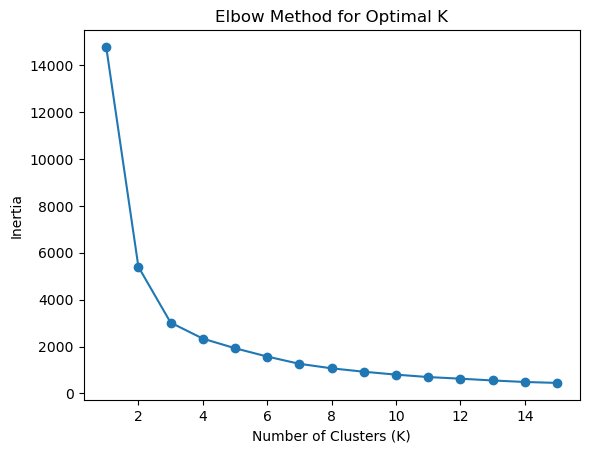

In [38]:
plt.plot(cluster_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

### Step 11: Cluster Symphony: Finalizing the Customer Segmentation Model


With the insights gained from the previous steps, I've chosen the optimal number of clusters, and the updated K-means model is poised to perform its magic.

Approach: Use the refined K-means model to classify customers, creating labels that assign each customer to a segment.
As the model fitting and prediction unfold, you're on the verge of unveiling the refined customer segments. 

In [39]:
updated_kmeans_model = KMeans(n_clusters=4, init='k-means++', max_iter=500, random_state=42, n_init=10)

res = updated_kmeans_model.fit_predict(customers.iloc[:, 3:])
res

array([3, 0, 1, ..., 0, 1, 0])

### Step 12: Cluster Insights Unleashed: Interpreting Cluster Centers.

In this data-driven odyssey, I've now reached the pinnacle with "Cluster Insights Unleashed." 
This code takes the refined cluster centers and transforms them back into their original, interpretable values. These centers represent the essence of each customer segment, reflecting product preferences, return rates, and total spending.

Objective: Transform the cluster centers to interpretable values to reveal customer segment profiles.

Approach: Inverse the log transformation to reflect original spending values, rounding to enhance readability.



In [41]:
cluster_centers = updated_kmeans_model.cluster_centers_
customers["clusters"] = updated_kmeans_model.labels_
customers.head()

,products_ordered,average_return_rate,total_spending,log_products_ordered,log_average_return_rate,log_total_spending,clusters
0,1,0.0,260.0,0.69,0.0,5.56,3
1,1,0.0,79.2,0.69,0.0,4.38,0
2,3,0.0,234.2,1.39,0.0,5.46,1
3,1,0.0,89.0,0.69,0.0,4.50,0
4,2,0.0,103.0,1.10,0.0,4.64,3


In [42]:
actual_data = np.expm1(cluster_centers)
actual_data

array([[1.00879898e+00, 1.15094367e-03, 7.64497478e+01],
       [2.40745988e+00, 5.62021618e-04, 2.83908247e+02],
       [3.95190414e+00, 4.46051948e-04, 5.81793693e+02],
       [1.52543611e+00, 5.51561673e-04, 1.59932108e+02]])

In [44]:

add_points = np.append(actual_data, cluster_centers, axis=1)

add_points = np.append(add_points, [[0], [1], [2], [3]], axis=1)



centers_df = pd.DataFrame(data=add_points, columns=["products_ordered",
                                                    "average_return_rate",
                                                    "total_spending",
                                                    "log_products_ordered",
                                                    "log_average_return_rate",
                                                    "log_total_spending",
                                                    "clusters"])

centers_df["clusters"] = centers_df["clusters"].astype("int")

centers_df

,products_ordered,average_return_rate,total_spending,log_products_ordered,log_average_return_rate,log_total_spending,clusters
0,1.008799,0.001151,76.449748,0.697537,0.001150,4.349629,0
1,2.407460,0.000562,283.908247,1.225967,0.000562,5.652167,1
2,3.951904,0.000446,581.793693,1.599772,0.000446,6.367833,2
3,1.525436,0.000552,159.932108,0.926414,0.000551,5.080983,3


In [45]:
# Round the values in the centers_df DataFrame to 2 decimal places
rounded_centers_df = centers_df.round(2)

customers_final = customers.copy()

### Step 13: Convergence of Insights - Combining Customer Data with Cluster Centers

I'm at the juncture of bringing together the customer data and the refined cluster centers. As I weave this tapestry, I'm not only uniting customer profiles with cluster centers, but I'm also assigning the identity of "center" to the cluster points.

Objective: Merge customer data with cluster centers, marking cluster centers for easy identification.
Approach: Append the cluster centers to the customer data, facilitating a unified view of customer segments.

Add a marker column for cluster centers and merge with customer data

In [47]:
#--- Inspect data ---
customers_final["is_center"] = 0
rounded_centers_df["is_center"] = 1
customers_final.head()


,products_ordered,average_return_rate,total_spending,log_products_ordered,log_average_return_rate,log_total_spending,clusters,is_center
0,1,0.0,260.0,0.69,0.0,5.56,3,0
1,1,0.0,79.2,0.69,0.0,4.38,0,0
2,3,0.0,234.2,1.39,0.0,5.46,1,0
3,1,0.0,89.0,0.69,0.0,4.50,0,0
4,2,0.0,103.0,1.10,0.0,4.64,3,0


In [48]:
rounded_centers_df.head()

,products_ordered,average_return_rate,total_spending,log_products_ordered,log_average_return_rate,log_total_spending,clusters,is_center
0,1.01,0.0,76.45,0.70,0.0,4.35,0,1
1,2.41,0.0,283.91,1.23,0.0,5.65,1,1
2,3.95,0.0,581.79,1.60,0.0,6.37,2,1
3,1.53,0.0,159.93,0.93,0.0,5.08,3,1


In [49]:

# Append the contents of rounded_centers_df to customers with ignore_index=True
customers = pd.concat([customers_final, rounded_centers_df], ignore_index=True)

# The customers DataFrame now contains the combined data from both DataFrames
customers.head()

,products_ordered,average_return_rate,total_spending,log_products_ordered,log_average_return_rate,log_total_spending,clusters,is_center
0,1.0,0.0,260.0,0.69,0.0,5.56,3,0
1,1.0,0.0,79.2,0.69,0.0,4.38,0,0
2,3.0,0.0,234.2,1.39,0.0,5.46,1,0
3,1.0,0.0,89.0,0.69,0.0,4.50,0,0
4,2.0,0.0,103.0,1.10,0.0,4.64,3,0


### Step 14: Visualizing Customer Segments - Bringing Clusters to Life.


In the ever-evolving realm of data analysis, your journey reaches an intriguing chapter titled "The Tapestry of Segmentation." With your clusters and customer data now harmoniously combined, you're about to unveil the magnitude of each customer group.

Objective: Visualize customer segments to gain insights into each cluster's spending and behavioral characteristics.
Approach: Use a scatter plot to plot clusters, distinguishing each with unique colors for clarity.


In [50]:
customers["cluster_name"] = customers["clusters"].astype(str)
final_result = customers.cluster_name.value_counts().reset_index()

final_result.rename(columns={"cluster_name": "Customer Groups", "count": "Customer Group Magnitude"}, inplace=True)

final_result

,Customer Groups,Customer Group Magnitude
0,0,10468
1,3,7236
2,1,5098
3,2,2076


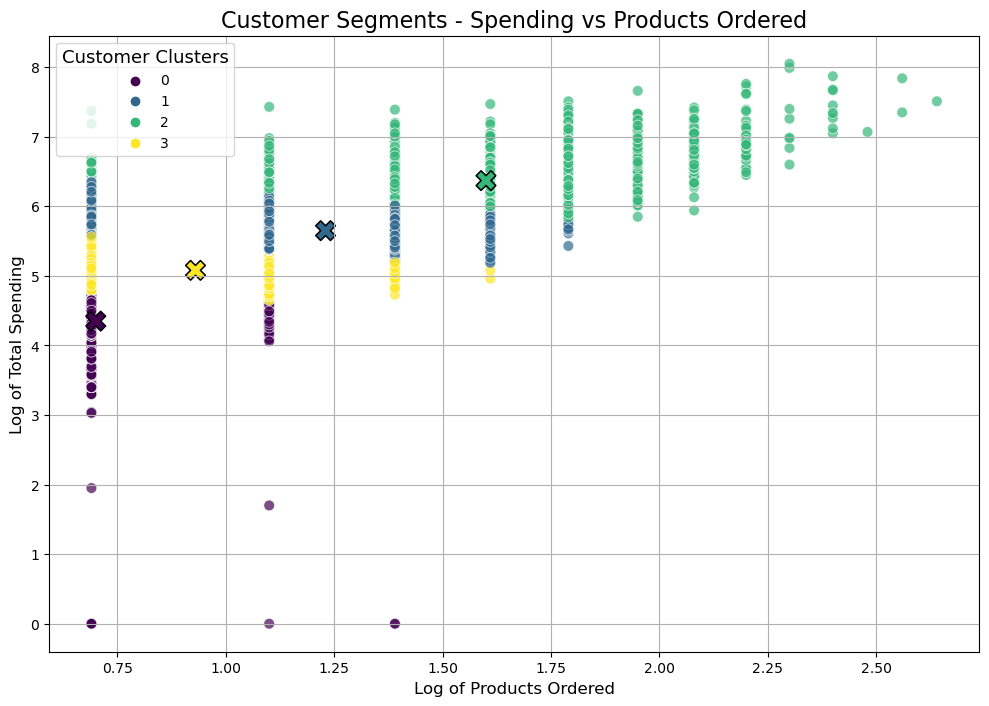

In [51]:
# Configure plot settings
plt.figure(figsize=(12, 8))

# Scatter plot of log-transformed 'products_ordered' vs 'total_spending', color-coded by clusters
sns.scatterplot(
    x="log_products_ordered", 
    y="log_total_spending", 
    hue="clusters", 
    data=customers[customers["is_center"] == 0],  # Plot customers, not cluster centers
    palette="viridis", 
    s=60, 
    alpha=0.7
)

# Overlay cluster centers for clarity
sns.scatterplot(
    x="log_products_ordered", 
    y="log_total_spending", 
    hue="clusters", 
    data=customers[customers["is_center"] == 1],  # Only cluster centers
    palette="viridis", 
    s=200, 
    marker="X", 
    edgecolor="black", 
    legend=False  # Exclude centers from the legend
)

# Enhancing the plot with labels and a legend
plt.title("Customer Segments - Spending vs Products Ordered", fontsize=16)
plt.xlabel("Log of Products Ordered", fontsize=12)
plt.ylabel("Log of Total Spending", fontsize=12)
plt.legend(title="Customer Clusters", title_fontsize="13", loc="upper left")
plt.grid(True)
plt.show()


In [17]:
# Calculate summary statistics by cluster
cluster_summary = customers.groupby("clusters").agg(
    avg_spending=("total_spending", "mean"),
    avg_orders=("products_ordered", "mean"),
    count=("clusters", "size")
).reset_index()

# Display the results
print(cluster_summary)


   clusters  avg_spending  avg_orders  count
0         0     78.812027    1.018438  10468
1         1    289.902964    2.481053   5098
2         2    615.931474    4.126180   2076
3         3    162.594532    1.581472   7236


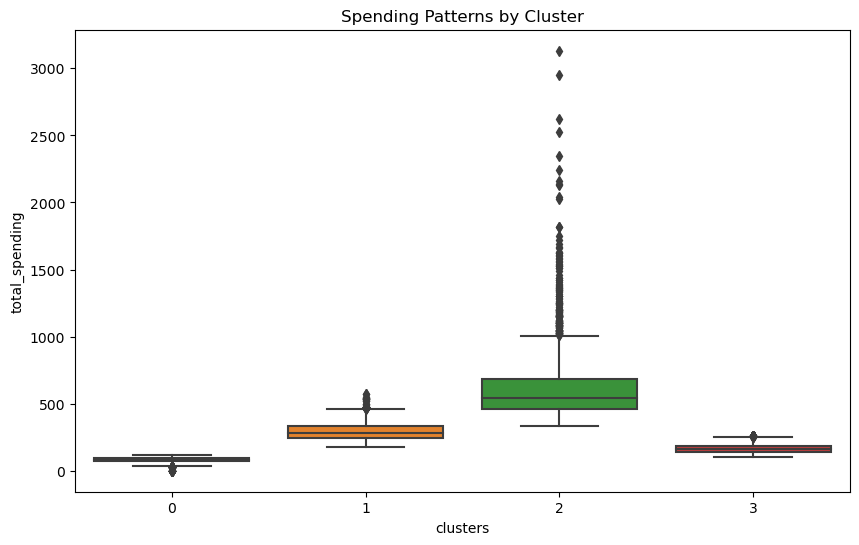

In [18]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot spending distribution for each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=customers, x='clusters', y='total_spending')
plt.title('Spending Patterns by Cluster')
plt.show()

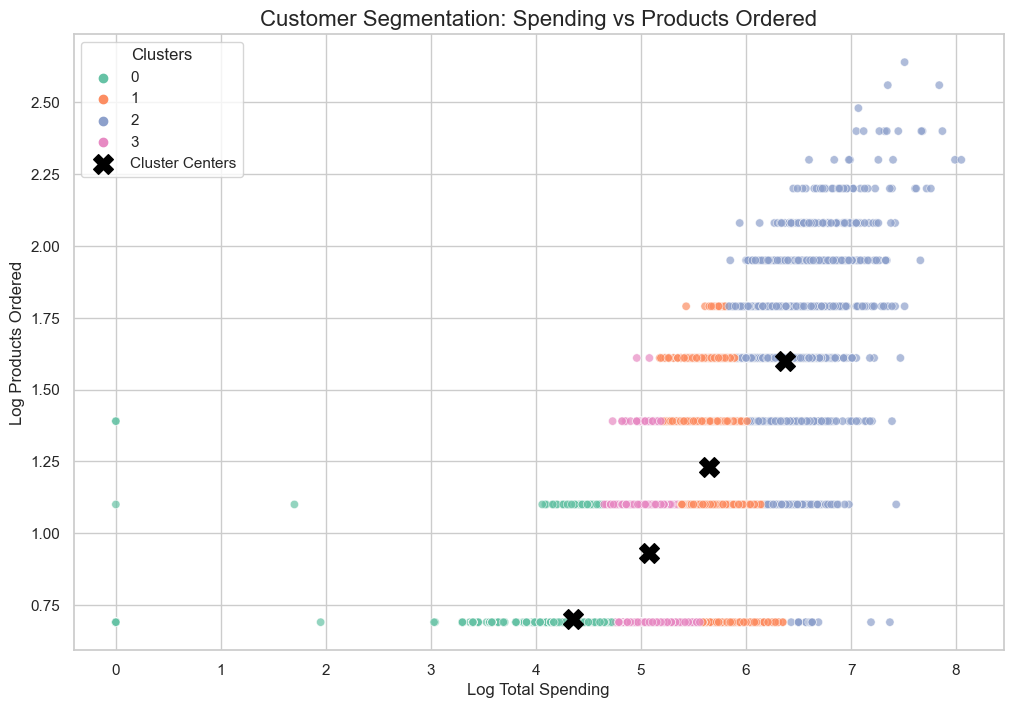

In [19]:
# Set visualization style
sns.set(style="whitegrid")

# Filter the customer data to separate clusters and cluster centers
cluster_data = customers[customers["is_center"] == 0]
cluster_centers = customers[customers["is_center"] == 1]

# Scatter plot for customer segmentation
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=cluster_data["log_total_spending"],
    y=cluster_data["log_products_ordered"],
    hue=cluster_data["clusters"],
    palette="Set2",
    alpha=0.7,
    legend="full"
)

# Overlay cluster centers
plt.scatter(
    cluster_centers["log_total_spending"],
    cluster_centers["log_products_ordered"],
    c="black",
    marker="X",
    s=200,
    label="Cluster Centers"
)

# Labels and title
plt.title("Customer Segmentation: Spending vs Products Ordered", fontsize=16)
plt.xlabel("Log Total Spending", fontsize=12)
plt.ylabel("Log Products Ordered", fontsize=12)
plt.legend(title="Clusters")
plt.show()


Cluster Characteristics:

Each cluster corresponds to a group of customers with unique spending and ordering patterns.
Cluster 2 are high-value customers are visually distinguishable from the rest with higher spending and higher product orders

### Results and Conclusion

The customer segmentation analysis for this e-commerce project revealed significant insights into customer behaviors and spending patterns. Through meticulous data transformation and K-means clustering, we identified four distinct customer segments. Each segment showcases unique characteristics, including variations in products ordered, return rates, and total spending.

- Customer Spending Analysis: The total spending data for each customer helped identify high-value customers, guiding the company to better target its promotional efforts and retain these customers.

- Log-Transformed Metrics: The application of logarithmic transformations and rounding provided a clearer view of customer engagement, enabling more granular customer segmentation and a better understanding of patterns across products ordered, average return rates, and spending.

- Cluster Profiles: Clusters created with K-means analysis show varying levels of customer spending and product interest, supporting strategic marketing and personalized offers. These profiles help the company focus on high-value segments and craft tailored experiences for each customer type.

- Cluster Centers: The cluster centers calculated in both original and log-transformed metrics allow the business to interpret the core characteristics of each segment, aiding in targeted campaign strategies and improved customer relationship management.

##### Insights
Diverse Customer Segments:

The data reveals four distinct customer segments (clusters), each exhibiting varying spending and ordering behavior. This segmentation suggests different customer profiles and preferences, which could be leveraged for targeted marketing strategies.

- High-Value Customers:

  - Cluster 2 stands out with the highest average spending of $615.93 and the highest average orders at 4.13. This group represents a smaller segment (2,076 customers) but could be critical for maximizing revenue. Targeted campaigns or loyalty programs could enhance retention and engagement within this group.
  
- Moderate Spenders:
  - Cluster 1 represents moderate spenders with an average spending of $289.90 and 2.48 orders. This group could benefit from upselling or cross-selling strategies to increase their average spending.

- Low-Value Customers:

  - Cluster 0 contains a large number of customers (10,468) but with a low average spending of $78.81 and only 1.02 orders. This group may require strategies to encourage additional purchases or increase their overall spending, such as promotions or loyalty rewards.
- Cluster 3 Analysis:

  - Cluster 3 features a significant number of customers (7,236) with an average spending of $162.59. While this group spends more than Cluster 0, there is still potential for growth. Tailored marketing efforts could help in converting these customers to higher spenders.

### Recommendations


1. Targeted Marketing:

   - Cluster 2 and Cluster 1 (high-value customers) should receive special attention, such as exclusive offers, early access to new products, and loyalty rewards to strengthen their relationship with the brand.
   - Cluster 3 customers have the potential to increase their spending with targeted incentives and cross-sell opportunities, which could nurture them into higher-value segments over time.
   - For example, premium offerings can be highlighted for Cluster 2, while promotional deals could attract Cluster 0.


2. Personalized Campaigns:

    - Use tailored messaging based on each segment’s purchasing habits. For example, Cluster 0 customers might benefit from discounts on frequently purchased items, while Cluster 3 could respond well to new product launches and limited-time offers.
    
    
3. Customer Retention Programs/Loyalty programs:

    - Implement loyalty programs specifically designed for Cluster 2 and 1 customers to maintain their engagement and satisfaction. For instance, offering points for purchases, faster delivery options, or dedicated customer support could increase brand loyalty.
    - Implement loyalty programs that reward frequent purchases, especially aimed at low-value customers in Cluster 0 to enhance their spending.
    
4. Upselling Opportunities: 
    - Identify products that can be upsold to moderate spenders in Cluster 1, focusing on bundles or add-ons that enhance perceived value.
    
5. Enhance Product Recommendations:

    - Leverage the log-transformed insights to inform a recommendation engine. High-value customers may appreciate personalized suggestions based on past purchases, increasing their likelihood to purchase more frequently.


6. Monitor and Re-evaluate Clusters:

   - Since customer behavior and market trends evolve, it's crucial to revisit the clustering analysis periodically. This will ensure that the segmentation remains relevant and adapts to any shifts in customer spending patterns or engagement levels.


7. Future Directions
   - Moving forward, this analysis could be enriched by incorporating additional variables like purchase frequency, preferred product categories, and seasonal spending trends to further refine customer profiles. Additionally, incorporating machine learning algorithms beyond K-means, such as hierarchical clustering, could provide alternative insights and help the business fine-tune its segmentation approach for an even more customized strategy.